In [40]:
#txt形式のFEMtop〇〇のxyz座標
filename_FEM="after_abs_sendan_top30"

In [41]:
#avizoのpore座標の書いてあるfilename,さっきtxtにした名前
filename_pore="after_Al"

In [42]:
#応力集中点からなるPD1を表すstl,txtを出力
filename_output="0914_after_abs_top30"

In [43]:
#応力座標とpore座標のズレ(x,y,z)
delta=250

In [44]:
xlim=[-100,1200]
ylim=[-100,1200]
width=100#100とか10とか50

In [45]:
import math
import numpy as np
import pandas as pd

In [46]:
DATA_DIR = "../data/model data/"
CACHE_DIR = "../data/cache/"
IMAGE_DIR = "../data/images/"
INVERSE_DIR = "../data/Inverse analysis/"
EXCEL_DIR = "../data/excel/"
PKL_DIR = "../data/pkl/"
TXT_DIR = "../data/txt/"

In [47]:
df = pd.read_table(f'{TXT_DIR}{filename_FEM}.txt', sep='\t',header=None)
df_FEM_=df.rename(columns={0: 'f_X', 1: 'f_Y',2:'f_Z'})


In [48]:

df_FEM_['X']=(df_FEM_['f_X']*1000//1).astype('int64')
df_FEM_['Y']=(df_FEM_['f_Y']*1000//1).astype('int64')
df_FEM_['Z']=(df_FEM_['f_Z']*1000//1).astype('int64')

df_FEM=df_FEM_[['X','Y','Z']]
df_FEM.head()

,X,Y,Z
0,5434,4028,6535
1,2052,4181,13946
2,5433,4028,6536
3,7485,9309,5548
4,5090,10441,5500


In [49]:
df_ = pd.read_table(f'{DATA_DIR}{filename_pore}.txt', sep='\t',header=None)
df_pore=df_.rename(columns={0: 'X', 1: 'Y',2:'Z',3:"R^2"})

df_pore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062 entries, 0 to 4061
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       4062 non-null   int64  
 1   Y       4062 non-null   int64  
 2   Z       4062 non-null   int64  
 3   R^2     4062 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 127.1 KB


In [50]:
df_FEM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       30 non-null     int64
 1   Y       30 non-null     int64
 2   Z       30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


In [51]:
S=df_FEM.values.tolist()
P=df_pore.values.tolist()
P[0]

[7296.0, 2242.0, 4902.0, 3674.013388745598]

In [52]:
df_main= pd.read_table(f'{EXCEL_DIR}{filename_pore}_pd1_output.csv', sep=',',header=0)

In [53]:
df_main

,Unnamed: 0,Birth,Death,Birth_Position_1_X,Birth_Position_1_Y,Birth_Position_1_Z,Birth_Position_2_X,Birth_Position_2_Y,Birth_Position_2_Z,Death_Position_1_X,Death_Position_1_Y,Death_Position_1_Z,Death_Position_2_X,Death_Position_2_Y,Death_Position_2_Z,Death_Position_3_X,Death_Position_3_Y,Death_Position_3_Z
0,0,89.339249,104.263288,2318.0,3230.0,6878.0,2394.0,3268.0,7144.0,2318.0,3230.0,6878.0,2394.0,3420.0,6992.0,2394.0,3268.0,7144.0
1,1,107.214874,115.734117,7790.0,5358.0,11932.0,7638.0,5396.0,12122.0,7790.0,5358.0,11932.0,7752.0,5548.0,12046.0,7638.0,5396.0,12122.0
2,2,111.473782,119.807859,1938.0,2964.0,12160.0,2166.0,3040.0,12274.0,1938.0,2964.0,12160.0,2166.0,3040.0,12274.0,1976.0,3116.0,12350.0
3,3,112.983411,123.460961,8018.0,2432.0,5776.0,7942.0,2698.0,5776.0,8018.0,2432.0,5776.0,7942.0,2698.0,5776.0,8056.0,2660.0,5928.0
4,4,118.037883,126.108673,8360.0,3458.0,14060.0,8474.0,3192.0,14060.0,8398.0,3306.0,13870.0,8360.0,3458.0,14060.0,8474.0,3192.0,14060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,3862,1018.818978,1023.062492,8588.0,8474.0,7790.0,7182.0,8398.0,9272.0,8588.0,8474.0,7790.0,7752.0,9500.0,8208.0,7182.0,8398.0,9272.0
3863,3863,1087.019033,1088.983200,8588.0,8474.0,7790.0,7030.0,7562.0,9006.0,8588.0,8474.0,7790.0,7030.0,7562.0,9006.0,7182.0,8398.0,9272.0
3864,3864,1102.181705,1102.209248,2090.0,3420.0,8892.0,3914.0,4142.0,9918.0,2090.0,3420.0,8892.0,3914.0,4142.0,9918.0,3914.0,3572.0,9994.0
3865,3865,1118.961985,1119.578586,1900.0,3838.0,8968.0,3914.0,4142.0,9918.0,2090.0,3420.0,8892.0,1900.0,3838.0,8968.0,3914.0,4142.0,9918.0


In [54]:
df_dp=df_main[["Death_Position_1_X","Death_Position_1_Y","Death_Position_1_Z","Death_Position_2_X","Death_Position_2_Y","Death_Position_2_Z","Death_Position_3_X","Death_Position_3_Y","Death_Position_3_Z"]]
df_dp

,Death_Position_1_X,Death_Position_1_Y,Death_Position_1_Z,Death_Position_2_X,Death_Position_2_Y,Death_Position_2_Z,Death_Position_3_X,Death_Position_3_Y,Death_Position_3_Z
0,2318.0,3230.0,6878.0,2394.0,3420.0,6992.0,2394.0,3268.0,7144.0
1,7790.0,5358.0,11932.0,7752.0,5548.0,12046.0,7638.0,5396.0,12122.0
2,1938.0,2964.0,12160.0,2166.0,3040.0,12274.0,1976.0,3116.0,12350.0
3,8018.0,2432.0,5776.0,7942.0,2698.0,5776.0,8056.0,2660.0,5928.0
4,8398.0,3306.0,13870.0,8360.0,3458.0,14060.0,8474.0,3192.0,14060.0
...,...,...,...,...,...,...,...,...,...
3862,8588.0,8474.0,7790.0,7752.0,9500.0,8208.0,7182.0,8398.0,9272.0
3863,8588.0,8474.0,7790.0,7030.0,7562.0,9006.0,7182.0,8398.0,9272.0
3864,2090.0,3420.0,8892.0,3914.0,4142.0,9918.0,3914.0,3572.0,9994.0
3865,2090.0,3420.0,8892.0,1900.0,3838.0,8968.0,3914.0,4142.0,9918.0


In [55]:
output_Coordinate = open(f'{INVERSE_DIR}{filename_output}.txt', 'w')
b_and_d=open(f'{CACHE_DIR}{filename_FEM}_birth_death_pair.txt', 'w')
count=0
O=[]
output_Coordinate.write('solid')
output_Coordinate.write(' ')
output_Coordinate.write('py')
output_Coordinate.write(' ')
output_Coordinate.write('3')
output_Coordinate.write(' ')
output_Coordinate.write('triangles')
output_Coordinate.write(' ')
output_Coordinate.write('9')
output_Coordinate.write(' ')
output_Coordinate.write('nodes')
output_Coordinate.write('\n')

for i in range(len(S)):#応力のデータ
    X,Y,Z=S[i][0],S[i][1],S[i][2]

    for j in range(len(P)):#avizoのデータ
        if P[j][0]<=X-delta or X+delta<=P[j][0]:
            continue
        if P[j][1]<=Y-delta or Y+delta<=P[j][1]:
            continue
        if P[j][2]<=Z-delta or Z+delta<=P[j][2]:
            continue

        O.append(P[j])

for k in range(len(O)):#x,y,zは応力集中気孔
    x=O[k][0]
    y=O[k][1]
    z=O[k][2]


    for l in range(len(df_dp)):#全death　positionに対して気孔座標を確認
        if (x==df_dp["Death_Position_1_X"][l] and y==df_dp["Death_Position_1_Y"][l] and z==df_dp["Death_Position_1_Z"][l]) or (x==df_dp["Death_Position_2_X"][l] and y==df_dp["Death_Position_2_Y"][l] and z==df_dp["Death_Position_2_Z"][l]) or (x==df_dp["Death_Position_3_X"][l] and y==df_dp["Death_Position_3_Y"][l] and z==df_dp["Death_Position_3_Z"][l]):#逆解析フォーマットに合わせるために4回改行(そもそもフォーマットを出力すれば(ry))
            output_Coordinate.write('{} {} {} {} {} {}'.format('','facet','normal',0,0,0))
            output_Coordinate.write('\n')
            output_Coordinate.write('{} {} {}'.format('','outer','loop'))
            output_Coordinate.write('\n')
            output_Coordinate.write('{} {} {} {} {}'.format('','vertex',df_dp["Death_Position_1_X"][l],df_dp["Death_Position_1_Y"][l],df_dp["Death_Position_1_Z"][l]))
            output_Coordinate.write('\n')
            output_Coordinate.write('{} {} {} {} {}'.format('','vertex',df_dp["Death_Position_2_X"][l],df_dp["Death_Position_2_Y"][l],df_dp["Death_Position_2_Z"][l]))
            output_Coordinate.write('\n')
            output_Coordinate.write('{} {} {} {} {}'.format('','vertex',df_dp["Death_Position_3_X"][l],df_dp["Death_Position_3_Y"][l],df_dp["Death_Position_3_Z"][l]))
            output_Coordinate.write('\n')
            output_Coordinate.write('\n')
            output_Coordinate.write('{} {}'.format('','endloop'))
            output_Coordinate.write('\n')
            output_Coordinate.write('endfacet')
            output_Coordinate.write('\n')
            b_and_d.write('{} {}'.format(df_main["Birth"][l],df_main["Death"][l]))
            b_and_d.write('\n')
            count+=1
output_Coordinate.write('endsolid')
output_Coordinate.close()
b_and_d.close()

In [56]:
import shutil
shutil.copyfile(f'{INVERSE_DIR}{filename_output}.txt',f'{INVERSE_DIR}{filename_output}.stl' )

'../data/Inverse analysis/0914_after_abs_top30.stl'

In [57]:
import matplotlib.pyplot as plt 
from matplotlib.collections import LineCollection

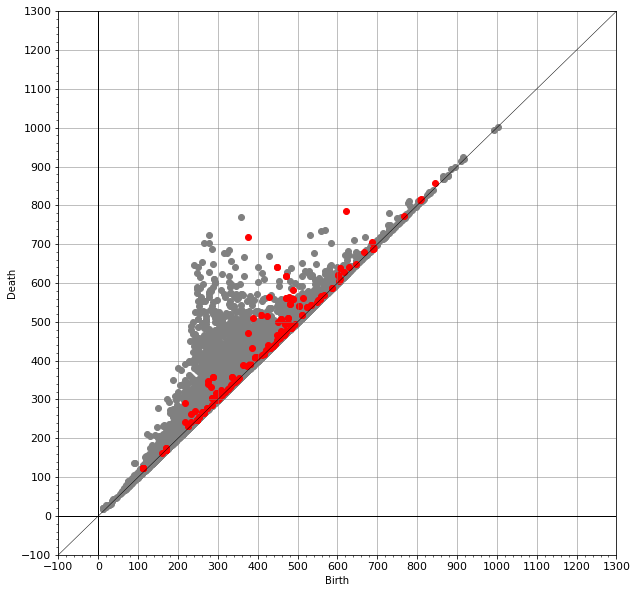

In [58]:
X=[]
Y=[]
plt.figure(figsize=(10,10))
def read_file(name):
    file=open('{}{}_birth_death_pair.txt'.format(CACHE_DIR,name), 'r')
    while True:
        file_datalist = file.readline()
        if file_datalist=='':
            break
        A=list(map(float,file_datalist.split()))
        X.append(A[0])
        Y.append(A[1])
    file.close()

read_file(filename_pore)
plt.scatter(X,Y,c="gray")
X=[]
Y=[]
read_file(filename_FEM)
plt.scatter(X,Y,c="red")
X=[]
Y=[]

plt.xlim(xlim)
plt.ylim(ylim)
plt.minorticks_on()
plt.grid(which="major", color="gray", linestyle="solid",linewidth=0.5)

plt.axvline(x=0, ymin=ylim[0], ymax=ylim[1],linewidth=1,c='black')
plt.axhline(y=0, xmin=xlim[0], xmax=xlim[1],linewidth=1,c='black')
plt.xticks([i for i in range(xlim[0],xlim[1]+width*2,width)],fontsize=11)
plt.yticks([i for i in range(ylim[0],ylim[1]+width*2,width)],fontsize=11)
plt.plot([xlim[0]-width, xlim[1]+width], [ylim[0]-width, ylim[1]+width],color="black",linewidth=0.5)



plt.xlabel("Birth")
plt.ylabel("Death")


plt.savefig("{}{}_pd1.png".format(IMAGE_DIR,filename_FEM),dpi=500)